<a href="https://colab.research.google.com/github/davidkant/mai-demo/blob/master/1_Coding_the_Illiac.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coding the Illiac

## Setup
Install dependencies and import libraries.

In [0]:
# install external libraries
from IPython.display import clear_output
!pip install -q git+https://github.com/davidkant/mai#egg=mai;
!apt-get -qq update
!apt-get -qq install -y libfluidsynth1
clear_output()

In [2]:
# imports
import mai
import random

from mai import make_music
from mai import make_music_plot

# shorthand
plot_music = mai.make_music_plot

Using TensorFlow backend.


```def: generate_and_test():``` we'll need this later...

In [0]:
def generate_and_test(rules=None, num_notes=12, first_note=None):

  # initialize the melody to an empty list
  my_melody = []

  if first_note:
    my_melody += [first_note]

  # loop until we have 12 notes
  while len(my_melody) < num_notes:
    
    # generate a random note between 0 and 108
    new_note = random.randint(30,90)

    # make it diatonic
    if not (new_note % 12) in [0, 2, 4, 5, 7, 9, 11]:
      continue

    # if no rules, just append
    if not rules:
      my_melody += [new_note]

    # if passes all rule, append new_note to the melody
    else:
      if all([rule(new_note, my_melody) for rule in rules]):
        my_melody += [new_note]
    
  # print the random melody
  return my_melody

## Representing music as number

**Pitch as `number`:** 

Numbers will represent *which* piano key, with the key middle `C` mapped to the value `60`:

![midi keyboard](https://raw.githubusercontent.com/davidkant/aim80L/master/resources/img/midi_keymap.jpg)


**Music as a `list` of `number`s:**

A melody is represented as a sequence of pitches.

In [4]:
# a list of numbers
my_music = [60, 61, 63, 61, 65, 66, 68]

# the list interpreted into music
make_music(my_music)

##Generate and Test
Composition as “a series of choices of musical elements from an essentially limitless variety of musical raw materials”.

**Algorithm: `Generate and Test`:**
  1. Generate a random note
  2. Test whether or not the new note satisfies our counterpoint rules
  3. If so, add it to the melody, if not, try again
  4. Repeat until...


## Sanity check: no rules
Generate a random melody (no test), for comparison as we add more rules.

In [5]:
# generate a random melody
my_melody = generate_and_test()

# and print it
print(my_melody)

[47, 79, 86, 55, 53, 76, 38, 76, 76, 36, 84, 47]


Plot the melody.

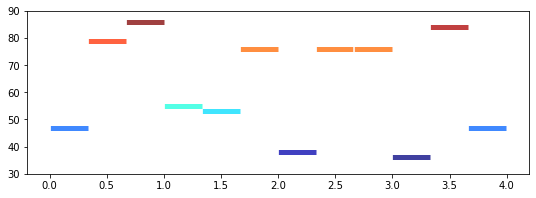

In [6]:
# piano roll plot
plot_music(my_melody, pitch_range=[30, 90])

Play the melody.

In [7]:
# play the melody
make_music(my_melody, durs=0.25)

## Rules
A `rule` is a small computer program that checks whether or not a specific counterpoint rule is met, evaluating to one of two values, either `True` or `False`.

## Rule 1: the octave rule
"No melodic line may span more than an octave."


In [0]:
def rule_1(new_note, prev_notes):
  """No melodic line may span more than an octave."""
  
  # highest pitch in the melody
  max_note = max(prev_notes + [new_note])

  # lowest pitch in the melody
  min_note = min(prev_notes + [new_note])

  # is the span less than an octave?
  return (max_note - min_note <= 12)

Generate a melody.

[60, 72, 60, 72, 67, 72, 60, 64, 69, 67, 69, 62]


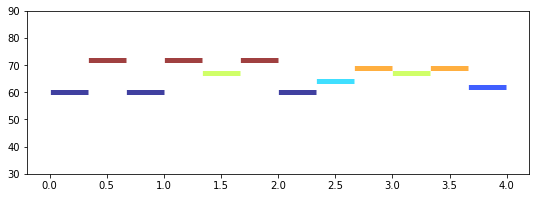

In [9]:
# generate melody with rule 1
my_melody = generate_and_test(rules=[rule_1])

# print it
print(my_melody)

# piano roll plot
plot_music(my_melody, pitch_range=[30,90])

# play the melody
make_music(my_melody, durs=0.25)

## Rule 4: no skips of a major or minor seventh
"A melodic skip of a major or minor seventh  is forbidden  because this is a dissonant melodic interval."

In [0]:
def rule_4(new_note, prev_notes):
  """No skips of a major or minor seventh."""
  
  # if it's first note, the rule is trivially true
  if len(prev_notes) < 1:
    return True

  # interval between new note and previous note
  interval = abs(new_note - prev_notes[-1])

  # is the interval not 11 and not 10 steps?
  return (interval != 11 and interval != 10)

Generate a melody.

[36, 48, 41, 45, 38, 41, 48, 48, 45, 47, 40, 43]


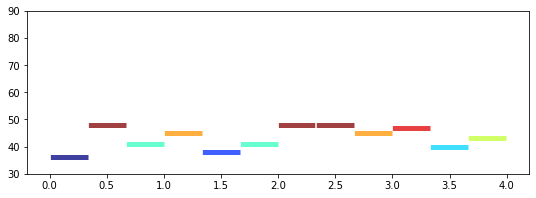

In [11]:
# generate melody with rule 4
my_melody = generate_and_test(rules=[rule_1, rule_4])

# print it
print(my_melody)

# piano roll plot
plot_music(my_melody, pitch_range=[30,90])

# play the melody
make_music(my_melody)

## Rule 5: a skip must be followed by stepwise motion
"Any melodic skip, i.e., a melodic movement  of a minor third or more, must be followed by a tone repeat or by a stepwise motion with or without a change in direction. A stepwise motion is a minor or major second."

In [0]:
def rule_5(new_note, prev_notes):
  """A skip must be followed by stepwise motion."""
  
  # we need at least two previous notes to check this rule
  if len(prev_notes) < 2:
    return True

  # intervals to last and second to last notes
  prev_interval = abs(prev_notes[-1] - prev_notes[-2])
  new_interval = abs(new_note - prev_notes[-1])

  # if it's a skip, check that the new interval is <= 2
  if prev_interval > 3:
     return (new_interval <= 2)

  # otherwise (not a skip), the rule is trivially true
  else:
    return True

Generate a melody.

[77, 81, 83, 76, 74, 77, 76, 77, 77, 86, 86, 86]


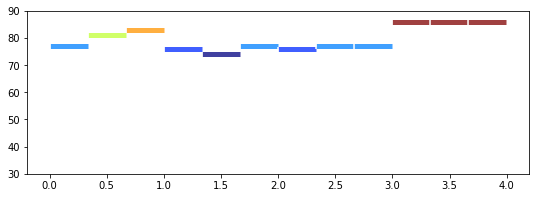

In [13]:
# generate a melody with rule 5
my_melody = generate_and_test(rules=[rule_1, rule_4, rule_5])

# print it
print(my_melody)

# piano roll plot
plot_music(my_melody, pitch_range=[30,90])

# play the melody
make_music(my_melody)

## Rule 6: no more than one successive repeat of a given note
"No more than one successive repeat of a given note is permitted."

In [0]:
def rule_6(new_note, prev_notes):
  """No more than one successive repeat of a given note."""

  # we need at least two previous notes to check this rule
  if len(prev_notes) < 2:
    return True

  # are the last three notes all equal?
  return not (new_note == prev_notes[-1] == prev_notes[-2])

Generate a melody.

[55, 67, 67, 60, 62, 65, 65, 62, 64, 59, 60, 65]


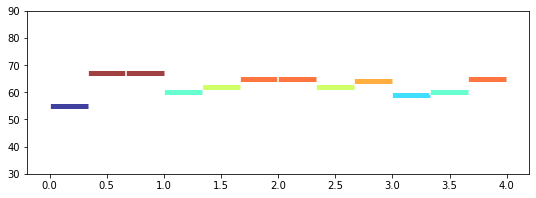

In [15]:
# generate a melody with rule 6
my_melody = generate_and_test(rules=[rule_1, rule_4, rule_5, rule_6])

# print it
print(my_melody)

# piano roll plot
plot_music(my_melody, pitch_range=[30,90])

# play the melody
make_music(my_melody)

## Rule 0: begin and end on the tonic... Backtracking
Here we add one final rule to force the melody to end on the same note that it starts on, but there's a catch...

In [0]:
def rule_0(new_note, prev_notes):
  """The cantus firmus must begin and end on the tonic."""

  # if this is the last pitch, end on the first note
  if len(prev_notes) == 12 - 1:
    return (new_note == prev_notes[0])

  # if this is NOT the last pitch, the rule doesn't apply
  else:
    return True

Generate a melody.

[83, 71, 72, 77, 76, 83, 81, 83, 81, 74, 76, 83]


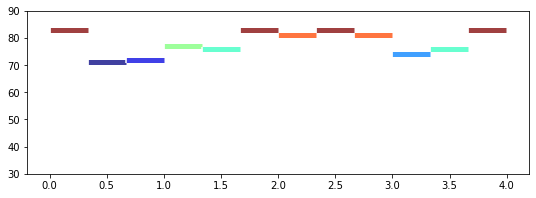

In [17]:
# generate a meldoy with rule 0
my_melody = generate_and_test(rules=[rule_0, rule_1, rule_4, rule_5, rule_6])

# print it
print(my_melody)

# piano roll plot
plot_music(my_melody, pitch_range=[30,90])

# play the melody
make_music(my_melody)

## Polyphony
This is just for fun... to illustrate the need for harmony rules. No vertical rules, just melodic rules.

In [18]:
my_melody_1 = generate_and_test(rules=[rule_0, rule_1, rule_4, rule_5, rule_6], first_note=60)
my_melody_2 = generate_and_test(rules=[rule_1, rule_4, rule_5, rule_6], first_note=64)
my_melody_3 = generate_and_test(rules=[rule_1, rule_4, rule_5, rule_6], first_note=67)
my_melody_4 = generate_and_test(rules=[rule_1, rule_4, rule_5, rule_6], first_note=60)

print(my_melody_1)
print(my_melody_2)
print(my_melody_3)
print(my_melody_4)

[60, 59, 55, 57, 55, 50, 52, 55, 53, 62, 60, 60]
[64, 60, 59, 55, 53, 53, 62, 60, 53, 52, 64, 64]
[67, 74, 72, 65, 65, 64, 71, 72, 76, 76, 69, 69]
[60, 57, 50, 48, 50, 50, 52, 48, 50, 59, 59, 50]


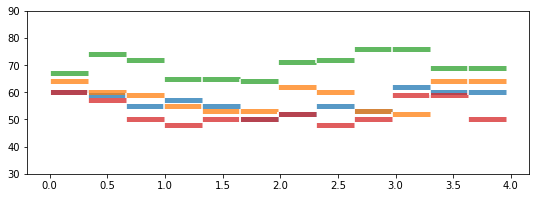

In [19]:
mai.music_makers.make_music_heterophonic_plot(
    [my_melody_1, my_melody_2, my_melody_3, my_melody_4], 
    durs=[[0.33]*12]*4,
    pitch_range=[30, 90],
)

mai.make_music_heterophonic(
    [my_melody_1, my_melody_2, my_melody_3, my_melody_4], 
    durs=0.5,
)